# Effectiveness of feedforward neural network for classifying images

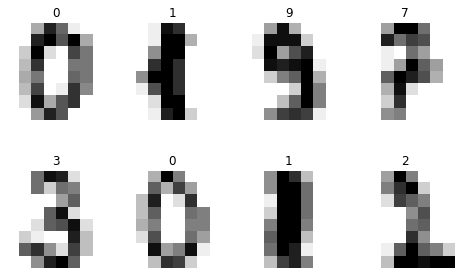

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
# import sys
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)


digits = load_digits()
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']
# print("data images target target_names: {} {} {} {}".format(len(data), len(images), len(target), len(target_names)))

fig = plt.figure(figsize=(8,5))
first_row = [0,99,199,299]
sec_row = [999, 1099, 1199, 1299]
n_plots = 8
i=0
for val in first_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
    
for val in sec_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='binary')
    plt.title(target[val])
    plt.axis('off')
    i +=1
# plt.imshow(images[0],cmap='binary')

##### Convert the image pixel data 'data' into a DataFrame and convert the 'target' numpy array containing the value of a digit at the corresponding index in 'data' into Series

In [2]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier 

# Convert the above arrays into DataFrames and Series
source_df = pd.DataFrame(data)
target_s = pd.Series(target)

# Shuffle the data
np.random.seed(1)
shuffled_index = np.random.permutation(source_df.index)
source_df = source_df.loc[shuffled_index]
target_s = target_s.loc[shuffled_index]


##### Linear and logistic regression assume linearity between input features and the output. Since k-nearest neighbor makes no such assumption, we can use to capture non-linearity of data. k-nearest neighbor compares every training observation with the test feature and chooses the closest match. So, let's use the KNeighborClassifer

# Train and Test using KNeighborClassifer with K-Fold Validation

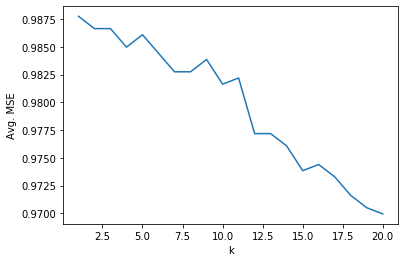

[0.9877567433803515, 0.9866431576342489, 0.9866456322692403, 0.9849752536500866, 0.9860900767136848, 0.9844221727295225, 0.9827517941103687, 0.9827530314278644, 0.9838653798564712, 0.9816382083642663, 0.9821937639198219, 0.977185102697352, 0.9771838653798565, 0.976073991586241, 0.9738468200940361, 0.9744023756495916, 0.9732900272209849, 0.9716196486018313, 0.9705073001732245, 0.9699517446176689]


In [3]:
## Performing 4-fold cross validation
kf = KFold(4, shuffle=True, random_state=1)

# We would like to find an optimal value of k so that we can get the least error.
k_values = 20
knn_avg_mses = []

for k in range(1,k_values+1):
    knn = KNeighborsClassifier(k)
    mses = cross_val_score(knn, source_df, target_s,scoring='accuracy',cv=kf)
    avg_mse = np.mean(mses)
    knn_avg_mses.append(avg_mse)
    
# plot a line graph
plt.plot(range(1,k_values+1), knn_avg_mses)
plt.xlabel('k')
plt.ylabel('Avg. MSE')
plt.show()
print(knn_avg_mses)

We performed  hyperparameterization to find most accuracy which is 98.78%. The optimal value is at k=1. For all other values of k, accuracy score is increasing. Due to limitations of the K-Nearest Neighbor, such as high memory usage and no model representation to debug and explore we would use MLPClassifier.

# Train and Test using MLPClassifer with K-Fold Validation

We will try different number of neurons with different number of hidden layer. We will use the same scoring method 'accuracy score' to determine if we can bring down our error.

### Number of hidden layers=1 with 4-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

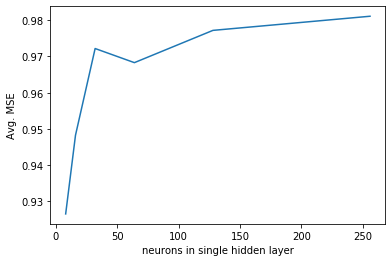

[0.9265602573620391, 0.9482479584261322, 0.9721764414748825, 0.9682826033160109, 0.9771826280623609, 0.9810801781737194]


In [4]:
from sklearn.neural_network import MLPClassifier

def get_avg_mse_list(hidden_layer_neurons, kf):
    mlp_avg_mses = []
    for n in hidden_layer_neurons:
        mlp = MLPClassifier(hidden_layer_sizes=n)
        mses = cross_val_score(mlp, source_df, target_s,scoring='accuracy',cv=kf)
        avg_mse = np.mean(mses)
        mlp_avg_mses.append(avg_mse)
    return mlp_avg_mses
        
hidden_layer_neurons = [(8,),
                        (16,),
                        (32,),
                        (64,),
                        (128,),
                        (256,)]
mlp_avg_mses = get_avg_mse_list(hidden_layer_neurons, kf)
x = [i[0] for i in hidden_layer_neurons]

# plot a line graph
plt.plot(x, mlp_avg_mses)
plt.xlabel('neurons in single hidden layer')
plt.ylabel('Avg. MSE')
plt.show()
print(mlp_avg_mses)

We get 98.10% accuracy at 256 neurons in single hidden layer. Comparing with KNeighborClassifer result above, we still need to improve our model. 

### Number of hidden layers=2 and 4-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

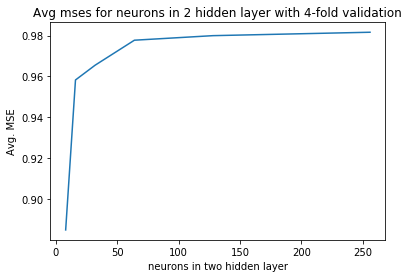

[0.8848403860430586, 0.9582677555060628, 0.9655035882207375, 0.9777406582529077, 0.9799678297451125, 0.981639445681762]


In [5]:
hidden_layer_neurons = [(8,8),
                        (16,16),
                        (32,32),
                        (64,64),
                        (128,128),
                        (256,256)]
    
mlp_avg_mses = get_avg_mse_list(hidden_layer_neurons, kf)
x = [i[0] for i in hidden_layer_neurons]

# plot a line graph
plt.plot(x, mlp_avg_mses)
plt.xlabel('neurons in two hidden layer')
plt.ylabel('Avg. MSE')
plt.title('Avg mses for neurons in 2 hidden layer with 4-fold validation')
plt.show()
print(mlp_avg_mses)


When number of hidden layers = 2 with 4-fold validation, the model accuracy is almost close to our single layer model. Accuracy score with this model is 98.16%

### Number of hidden layers=2 and perform 6-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

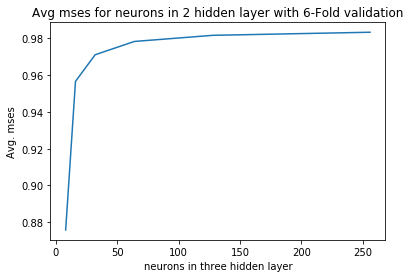

[0.8758268301746561, 0.9565997770345597, 0.9710628019323672, 0.9783054626532888, 0.9816406540319583, 0.983312894834634]


In [6]:
kf_6 = KFold(6, shuffle=True, random_state=1)

mlp_avg_mses = get_avg_mse_list(hidden_layer_neurons, kf_6)
x = [i[0] for i in hidden_layer_neurons]    
    
plt.plot(x, mlp_avg_mses)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 2 hidden layer with 6-Fold validation')
plt.show()
print(mlp_avg_mses)

When number of hidden layers=2 with 6-Fold validation, the accuracy is 98.33% which is still not a lot of improvement compared to our previous model and hasn't come close to our KNN Classifier model.

### Number of hidden layers=3 with 4-Fold validation. 

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

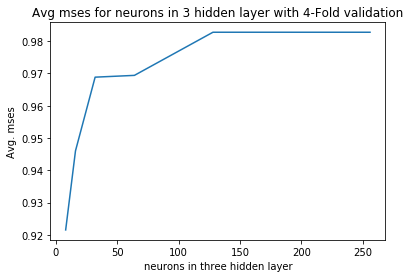

[0.9215429349170996, 0.9460195496164316, 0.9688406335065579, 0.9693949517446178, 0.982750556792873, 0.9827480821578817]


In [7]:
hidden_layer_neurons = [(8,8,8),
                        (16,16,16),
                        (32,32,32),
                        (64,64,64),
                        (128,128,128),
                        (256,256,256)]

mlp_avg_mses = get_avg_mse_list(hidden_layer_neurons, kf)
x = [i[0] for i in hidden_layer_neurons]

plt.plot(x, mlp_avg_mses)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 3 hidden layer with 4-Fold validation')
plt.show()
print(mlp_avg_mses)

When number of hidden layer=3 with 4-Fold validation, the model's performance has decreased. It might be due to overfitting.
Let's try 6-Fold Validation with 3 hidden layers to see just to double check if the conclusion holds.

### Number of hidden layers=3 with 6-Fold validation

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

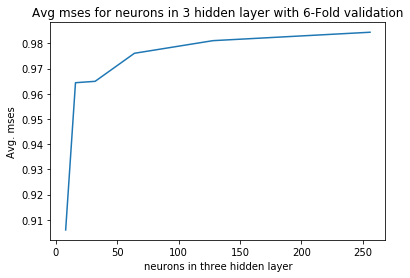

[0.9059940542549239, 0.9643961352657006, 0.9649461166852472, 0.9760702341137123, 0.9810813823857303, 0.9844202898550725]


In [8]:
mlp_avg_mses = get_avg_mse_list(hidden_layer_neurons, kf_6)
x = [i[0] for i in hidden_layer_neurons]    
    
plt.plot(x, mlp_avg_mses)
plt.xlabel('neurons in three hidden layer')
plt.ylabel('Avg. mses')
plt.title('Avg mses for neurons in 3 hidden layer with 6-Fold validation')
plt.show()
print(mlp_avg_mses)


Even with number of hidden layer=3 with 6-Fold validation, the model returned an accuracy of 98.4% but it still did not come close to KNN Classifier accuracy score which is 98.78%